In [13]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Data

In [14]:
df=pd.read_csv("/home/enacom/Downloads/html5up-phantom/business_analysis/data/LargestCompaniesInUSAbyReveneue.csv")

In [15]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [17]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [18]:
df[df.duplicated ()]

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [29]:
df.shape

(100, 7)

## Adjusting the Dataset

In [19]:
df['Revenue growth']=df['Revenue growth'].str.replace('%',' ') 
df['Revenue growth']=df['Revenue growth'].astype(float)
df['Revenue (USD millions)']=df['Revenue (USD millions)'].str.replace(',','')
df['Revenue (USD millions)']=df['Revenue (USD millions)'].astype(float)
df['Employees']=df['Employees'].str.replace(',','')
df['Employees']=df['Employees'].astype(int)
df=df.rename(columns={'Revenue growth': 'Revenue growth %'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int64  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth %        100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


## Plotting Graphs

<Axes: title={'center': 'Top 5 company Revenue Growth'}, xlabel='Name', ylabel='Revenue growth %'>

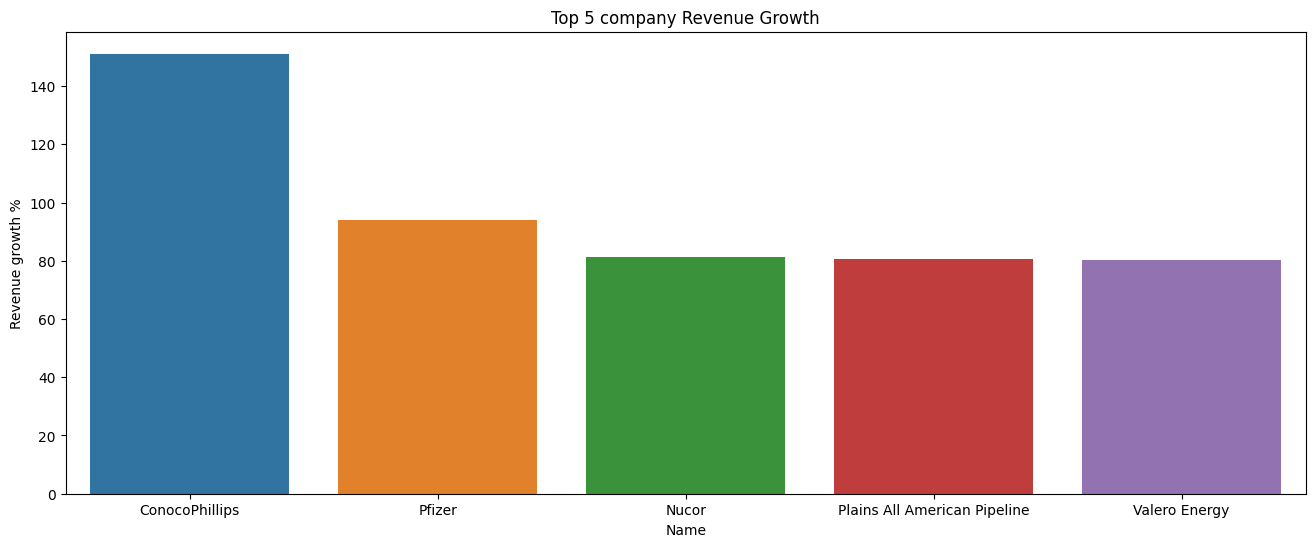

In [21]:
Top_5 =df.nlargest(5,'Revenue growth %')
plt.figure(figsize=(16,6))
plt.title("Top 5 company Revenue Growth")
sns.barplot(data=Top_5,x='Name',y='Revenue growth %')

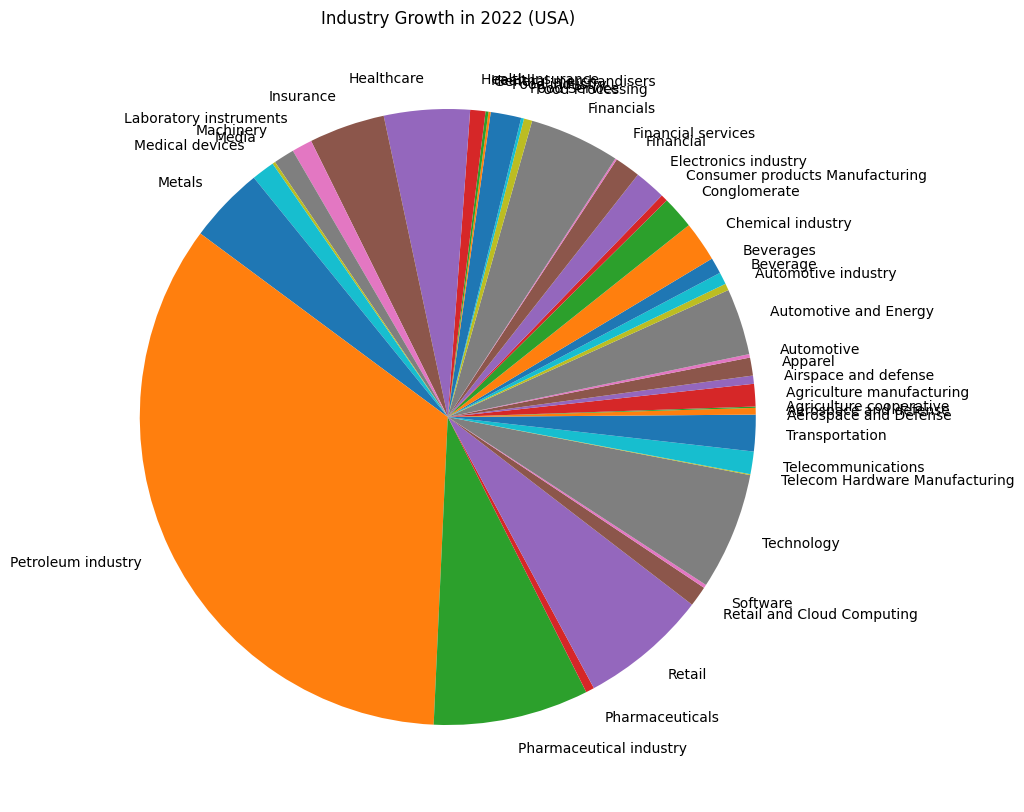

In [22]:
IER = df.groupby(['Industry'])['Revenue growth %'].sum()
plt.figure(figsize=(25,10))
plt.title("Industry Growth in 2022 (USA)")
plt.pie(IER, labels=IER.index)
plt.show()

In [24]:
IER.nlargest(4)

Industry
Petroleum industry         698.0
Pharmaceutical industry    165.3
Retail                     136.0
Technology                 124.8
Name: Revenue growth %, dtype: float64

<Axes: title={'center': 'Industry with Workforce'}, xlabel='Industry'>

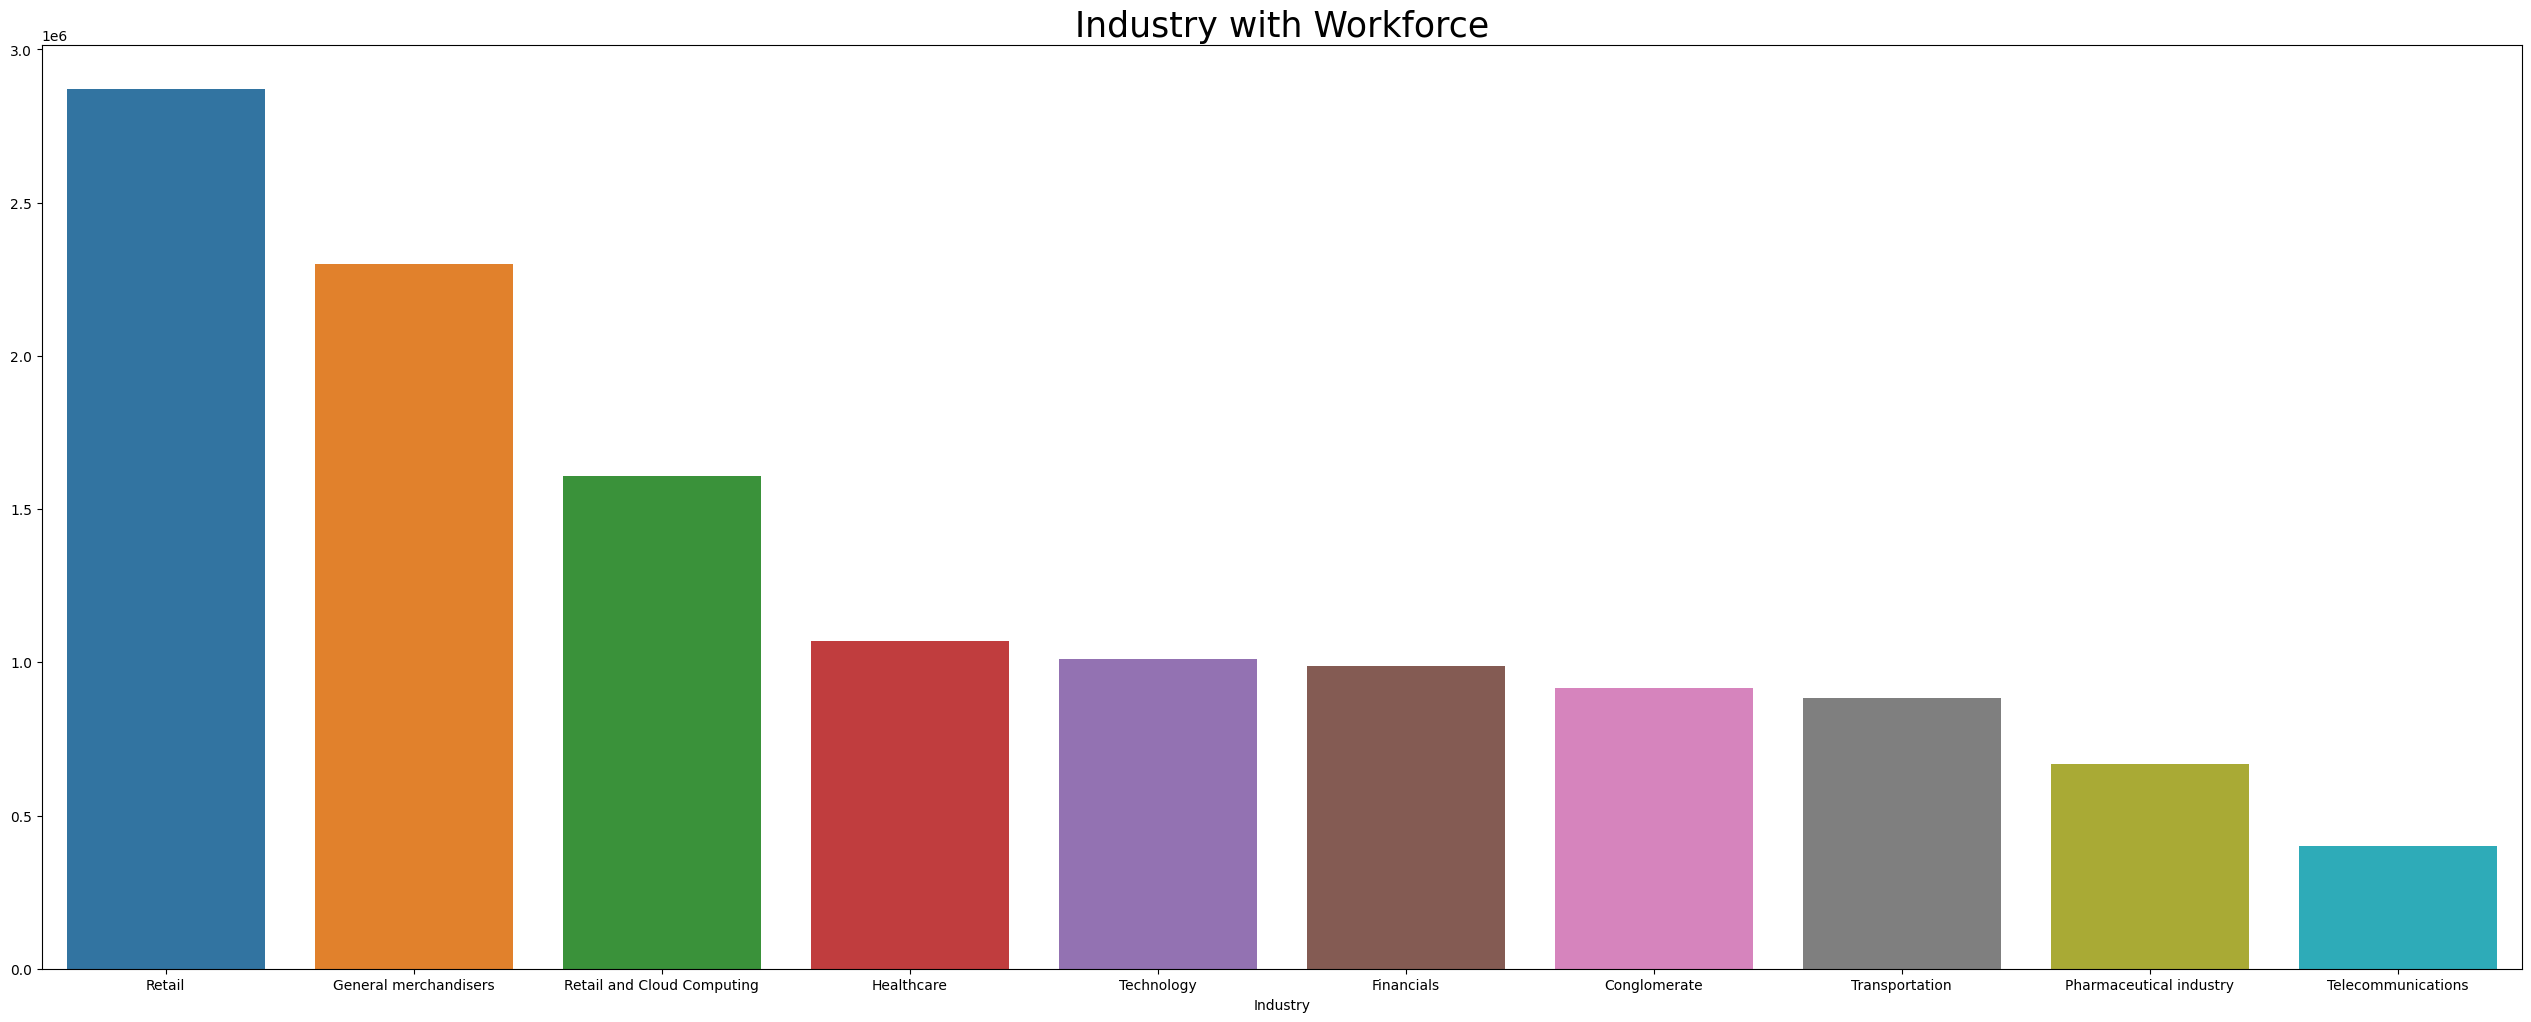

In [25]:
hwf=df.groupby(['Industry'])['Employees'].sum()
top=hwf.nlargest(10)
plt.figure(figsize=(32,12))
plt.title("Industry with Workforce",size=25)
sns.barplot(x=top.index,y=top.values)

In [26]:
hwf.nlargest(5)

Industry
Retail                        2871975
General merchandisers         2300000
Retail and Cloud Computing    1608000
Healthcare                    1069527
Technology                    1011870
Name: Employees, dtype: int64

<Axes: title={'center': 'Total Petroleum Company Revenue growth 2022'}, xlabel='Name', ylabel='Revenue growth %'>

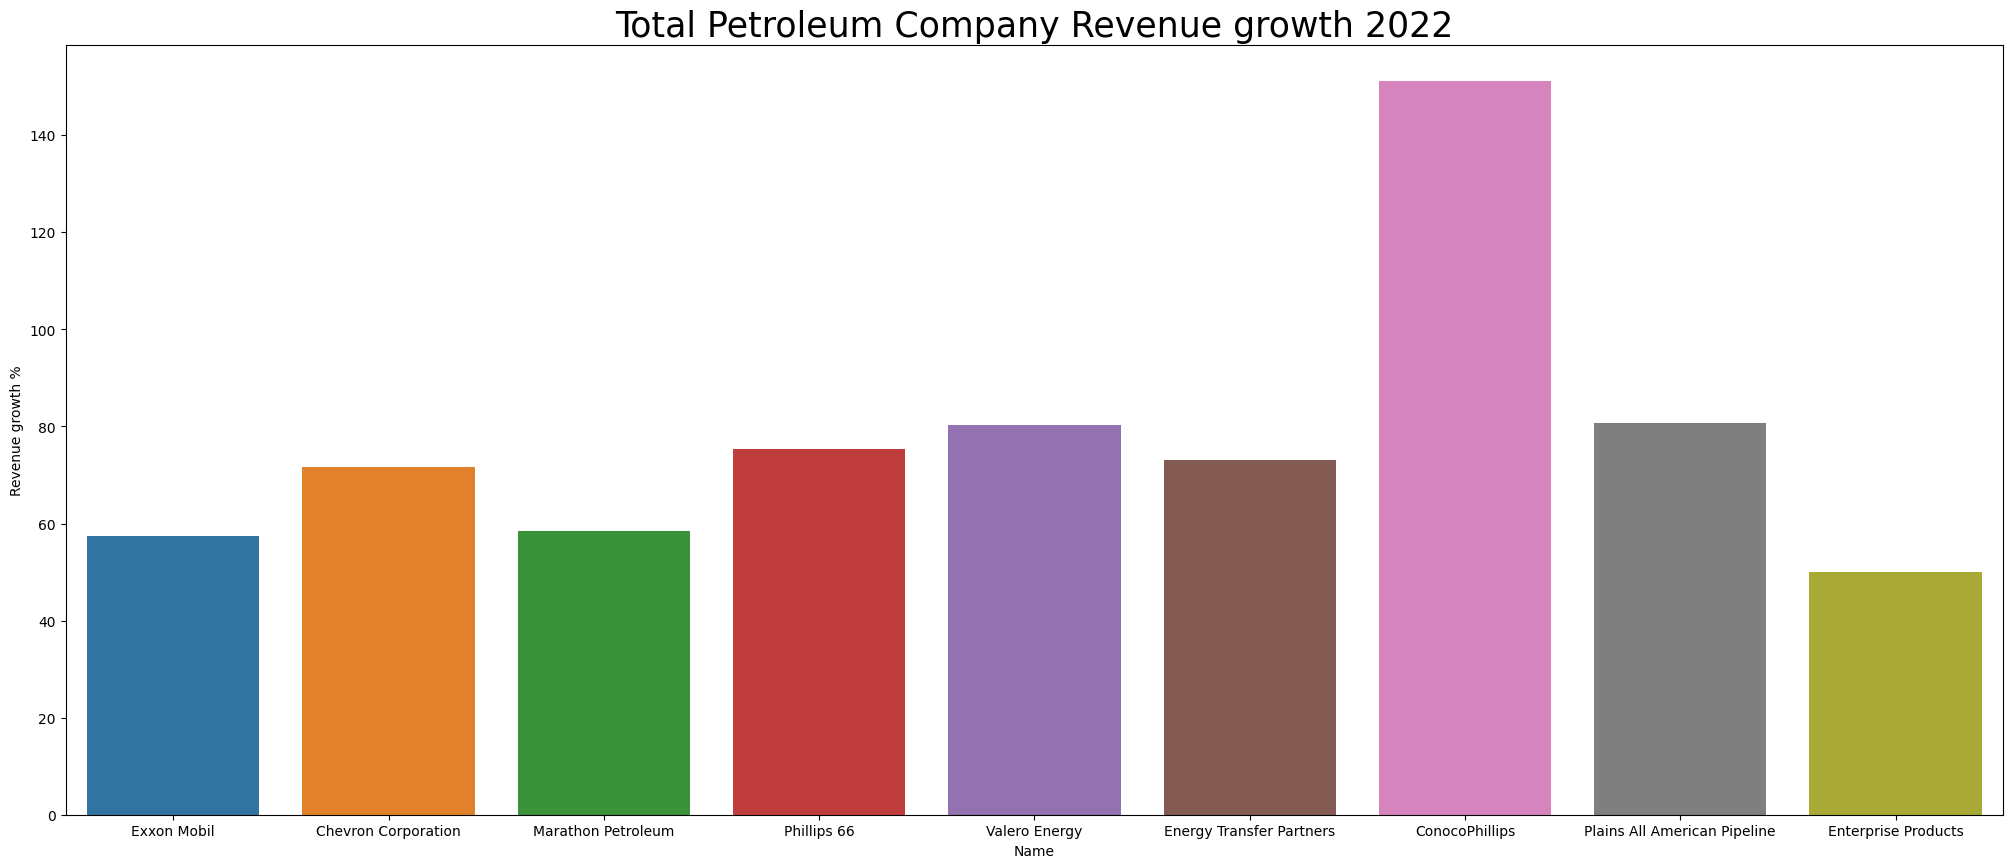

In [27]:
cmi=df.loc[(df['Industry']=='Petroleum industry')] 
plt.figure(figsize=(25,10))
plt.title("Total Petroleum Company Revenue growth 2022",size=25)
sns.barplot(data=cmi,x='Name',y='Revenue growth %')

<Axes: title={'center': 'Finance Campany Revenue in 2022'}, xlabel='Name', ylabel='Revenue (USD millions)'>

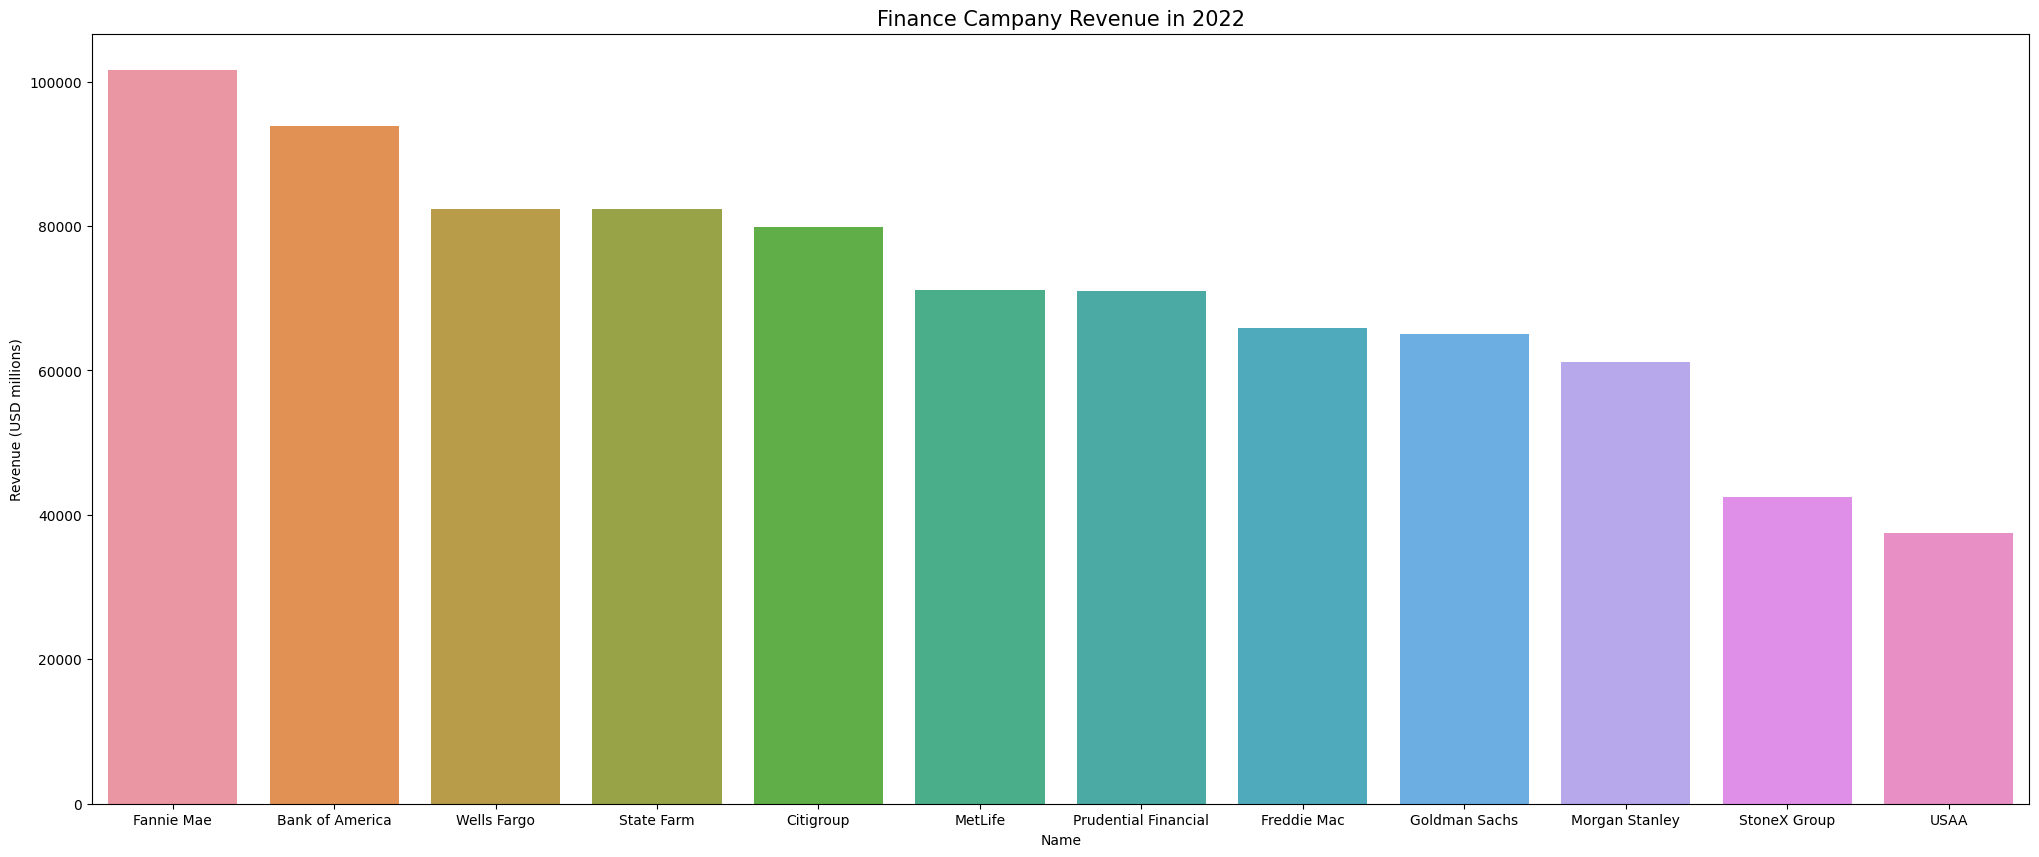

In [28]:
ist=df.loc[(df['Industry']=='Financials')]
plt.figure(figsize=(25,10))
plt.title("Finance Campany Revenue in 2022",size=15)
sns.barplot(data=ist,x='Name',y='Revenue (USD millions)')